# Modeling and Simulation 2 - Introduction to Statistical Methods

Monte Carlo methods are a class of computational algorithms that use random sampling and statistical inference techniques to solve complex problems in various fields such as physics, finance, engineering, and computer science.

These methods are based on the concept of repeated random sampling to estimate numerical results, often using simulation techniques to model real-world scenarios. Monte Carlo methods can be used to solve problems that are difficult or impossible to solve analytically.

The basic idea behind Monte Carlo methods is to generate random samples of a given system or process, and then use statistical analysis to estimate properties or outcomes of interest. By running simulations with a large number of random samples, the method can produce very accurate results.

For example, in finance, Monte Carlo methods can be used to simulate the behavior of stock prices or interest rates over time, allowing investors to estimate the risk of various investments. In physics, Monte Carlo methods can be used to simulate the behavior of complex systems such as particles in a gas or the behavior of a material under various conditions. But we will focus on more advanced methods, such as those after a few labs.

We are going to need NumPy and matplotlib for this lab.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Computing constants using Monte Carlo Methods

In many scientific and engineering applications, it is often necessary to compute the values of mathematical constants, such as π and e, to a high degree of accuracy (some of you may say that we already know these to a satisfying degree, but we can use these methods to compute some more complicated constants, such as Avogadro's constant or the gravitational constant). Exact solutions to these constants can be difficult or impossible to obtain using traditional methods, especially when dealing with complex functions or systems. In these cases, Monte Carlo methods provide a powerful and flexible approach for approximating the values of these constants using random sampling techniques.

In this section, we will explore the use of Monte Carlo methods for approximating mathematical constants, specifically π. We will start by introducing the basic principles of Monte Carlo methods and the concept of importance sampling, which can be used to improve the efficiency and accuracy of the approximation. We will then implement two Monte Carlo algorithms to estimate the value of pi, and analyze the accuracy and convergence properties of each algorithm.

### Disclaimer
Monte Carlo methods' performance is heavily dependent on the quality of the randomness provided by the machine. Given a perfectly random number generator, we could compute some constants to an arbitrary degree of precision, however there are limits to the quality of randomness that Python can provide, that we will explore in this section.

### Method 1: Area of a quadrant

The idea is to simulate random (x, y) points in a 2-D plane with the domain as a square of side 1 units centered on (0.5, 0.5). Imagine a circle of radius 1 centered in (0, 0). In our domain [0, 1]x[0, 1], a quadrant of the circle will be inscribed. To approximate $\pi$, we will need to calculate the ratio of the number of points that are within the quadrant to the points that are outside of it. We can visualize the problem using the following code:

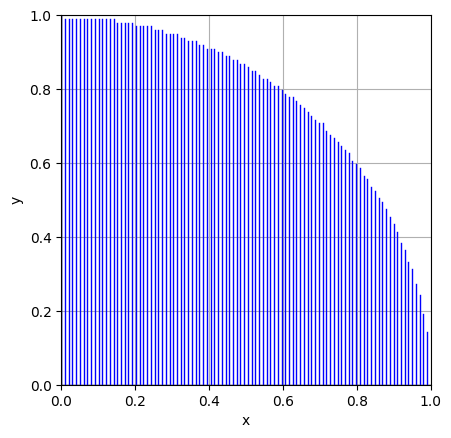

In [8]:
# Create a 2D grid of x and y values
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute the distance from each point to the origin
R = np.sqrt(X**2 + Y**2)

# Set all points outside the first quadrant to NaN
mask = (X < 0) | (Y < 0) | (R > 1)
X[mask] = np.nan
Y[mask] = np.nan

# Create a plot of the domain and circle quadrant
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.plot([0, 1], [0, 0], color='black', lw=1)
ax.plot([0, 0], [0, 1], color='black', lw=1)
ax.plot(X, Y, color='blue', lw=1)

# Show the plot
plt.show()

We know that the area of the domain is $1^2 = 1$, while the area of the circle of radius $r=1$ is $\pi r^2 = \pi$. However, since only a quadrant of the circle is inscribed within the domain, its area is $\pi / 4$. Therefore, we get the following ratio of areas.

$$ \frac{area\ of\ the\ quadrant}{area\ of\ the\ domain} = \frac{\pi}{4}.$$

Thus, if we were to generate points randomly within our domain, assuming a uniform distribution of numbers, we would get:

$$ \frac{number\ of\ points\ within\ quadrant}{total\ number\ of\ points} = \frac{pi}{4}. $$

In [12]:
# this function should return the pi approximation and the array of points generated
def compute_pi(iterations):
    x_coords = []
    y_coords = []
    inside_circle = 0

    for _ in range(iterations):
        x = np.random.uniform(0, 1)  # Generate random x in [0, 1]
        y = np.random.uniform(0, 1)  # Generate random y in [0, 1]

        x_coords.append(x)
        y_coords.append(y)

        # Check if point is inside the unit circle quadrant
        if (x**2 + y**2) <= 1:
            inside_circle += 1

    # Approximate pi using the formula: pi = 4 * (points inside circle) / (total points)
    pi_approximation = 4 * (inside_circle / iterations)

    return pi_approximation, [x_coords, y_coords]

Your pi approximation is: 3.1536


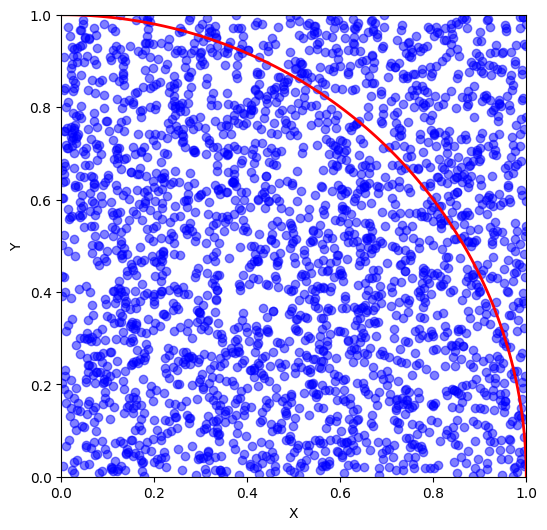

In [16]:
iterations = 2500

pi, [x, y] = compute_pi(iterations)
print("Your pi approximation is: " + str(pi))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the circle quadrant
theta = np.linspace(0, np.pi/2, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax.plot(x_circle, y_circle, 'r-', linewidth=2)

# Plot the random points
ax.scatter(x, y, color='blue', alpha=0.5)

# Set the x and y axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Add axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Display the plot
plt.show()

### Buffon's Needle

![image.png](attachment:3fc32e88-de69-4c9f-b143-36ffc1935fdb.png)

In mathematics, Buffon's needle problem is a question first posed in the 18th century by Georges-Louis Leclerc, Comte de Buffon:

_Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor. What is the probability that the needle will lie across a line between two strips?_

Buffon's needle was the earliest problem in geometric probability to be solved; it can be solved using integral geometry. The solution for the sought probability p, in the case where the needle length ℓ is not greater than the width t of the strips, is

$$ p={\frac {2}{\pi }}\cdot {\frac {\ell }{t}}. $$

We will not delve into details regarding this formula, but it stems from the following diagram, where we integrate the gray area:

![image.png](attachment:dec6b847-0242-4144-b6d4-4a43caa2b776.png)

As you can see, the problem was not created with Monte Carlo methods in mind, but we can reverse engineer the problem to turn it into one. Suppose we know $l$, $t$, and we can get the probability $P$ by making repeated experiments. We don't know $\pi$ and we want to approximate it. This turns our equation into the following.

$$ \pi = \frac{2l}{tP}.$$

If we drop $n$ needles and $h$ of them are crossing the lines, this leads us to the formula:

$$ \pi = \frac{2l * n}{th}. $$

In 1901, Italian mathematician Mario Lazzarini performed Buffon's needle experiment. Tossing a needle 3408 times, he obtained the well-known approximation 355/113 for π. We will try to do the same thing as he did, but in Python.

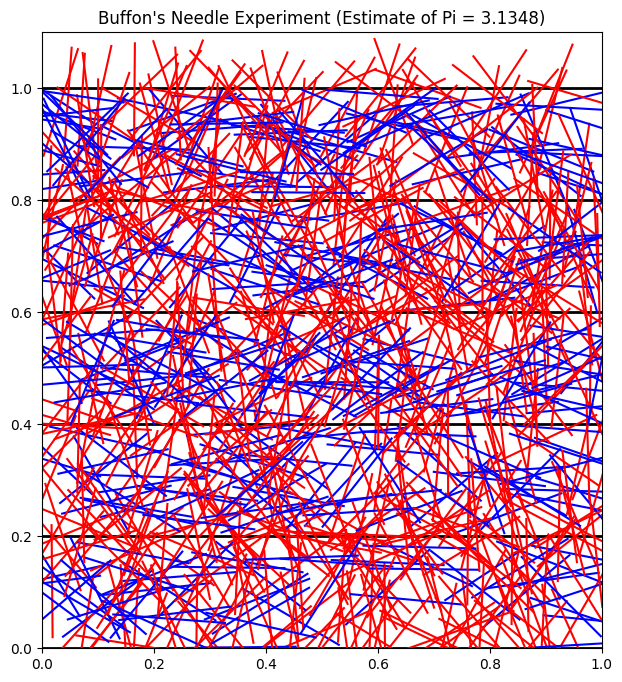

In [22]:

# Set the length of the needle and the distance between the lines
L = 0.2
t = 0.2

# Define the number of needles to drop and the number of hits
n_needles = 1000
n_hits = 0

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the lines
for i in range(10):
    y = i * t
    ax.plot([0, 1], [y, y], 'k-', linewidth=2)

# TODO return the x and y positions of both ends of the needles
def generate_needles(n_needles, L):  # Added L as an argument
    x_coords = [[], []]  # List to store x-coordinates of needle ends
    y_coords = [[], []]  # List to store y-coordinates of needle ends

    for _ in range(n_needles):
        # Generate random center point of the needle
        x_center = np.random.uniform(0, 1)
        y_center = np.random.uniform(0, t * 5)  # Adjusted for plot area

        # Generate random angle of the needle
        angle = np.random.uniform(0, np.pi)

        # Calculate coordinates of needle ends
        x_coords[0].append(x_center - L / 2 * np.cos(angle))
        x_coords[1].append(x_center + L / 2 * np.cos(angle))
        y_coords[0].append(y_center - L / 2 * np.sin(angle))
        y_coords[1].append(y_center + L / 2 * np.sin(angle))

    return x_coords, y_coords

# TODO check if a needle crosses a line
def crosses_line(x_start, x_end, y_start, y_end, t): # Added t as an argument
    # Check if the needle crosses any of the horizontal lines (y = n*t)
    for i in range(10):  # Assuming 10 lines as in the original code
        line_y = i * t
        # Check if the needle's y-range overlaps with the line's y-value
        if min(y_start, y_end) <= line_y <= max(y_start, y_end):
            # Calculate intersection point using line equations
            # (x - x_start) / (x_end - x_start) = (line_y - y_start) / (y_end - y_start)
            # Solve for x:
            if y_end - y_start != 0: # Avoid division by zero
                x_intersect = x_start + (x_end - x_start) * (line_y - y_start) / (y_end - y_start)
                # Check if the intersection point is within the x-bounds of the plot (0 to 1)
                if 0 <= x_intersect <= 1:
                    return True  # Needle crosses the line
    return False  # Needle doesn't cross any lines

x, y = generate_needles(n_needles, L)

for i in range(n_needles):
    if crosses_line(x[0][i], x[1][i], y[0][i], y[1][i], t):
        n_hits += 1
        color = 'r'
    else:
        color = 'b'

    # Plot the needle
    ax.plot([x[0][i], x[1][i]], [y[0][i], y[1][i]], color=color)

# TODO calculate the estimate of pi
pi_estimate = (2 * L * n_needles) / (t * n_hits) if n_hits > 0 else 0

# Display the plot and the estimate of pi
ax.set_xlim([0, 1])
ax.set_ylim([0, t * 5.5])
ax.set_aspect('equal')
ax.set_title(f'Buffon\'s Needle Experiment (Estimate of Pi = {pi_estimate:.4f})')
plt.show()

## Catching Criminals with Statistics

Over the past few decades, several mathematical models have been developed to facilitate and optimize the process of identifying serial killers. One such model, which was the first of its kind, is Rossmo's model.

Some assumptions that helped build the model

- The serial killer will not commit crimes so close to his home so that the police don’t suspect him.
- The serial killer will also not travel too far to commit his crimes (effort/reward ratio).
- The serial killer will commit the next crime as far away as possible from the previous crimes so that the police don’t suspect they’ve been committed by the same criminal.

Given these three premises, it would be reasonable to infer that the locus of a serial killer's activities would form a perimeter encircling all crime scenes, positioned at a moderate distance from the center and from each other.

We are going to need two formulas to be able to determine the probability of the serial killer being at the point (i, j) on a grid.

First, we are going to need to define the buffer zone around which the criminal is less likely to be active (from the first assumption), but outside of which crimes are more probable. We will consider the following formula for this area's radius:

$$ R = \frac{1}{2T} \sum_{i=1}^{T} min(d(c_i, c_j)), j \in [1, T], j \neq i.$$

Where $d$ is the distance metric that we will choose (manhattan or euclidean). T is the total number of crimes and $c$ are the locations of the crimes being commited.

Since this model was developed around finding criminals around big cities in the US, cities are modeled by a grid map. The probability that the serial killer is located at the block in row $i$ and column $j$ was described by criminologist Kim Rossomo as:

$$ p_{i, j} = k \sum_{crime\ c}(\frac{\phi_{i,j}}{d(x_{i,j}, c)^f} + \frac{(1 - \phi_{i,j})(R^{g-f})}{(2R - d(x_{i,j}, c))^g}) .$$

where

- $k$ is a normalizing constant so that $p_{i, j}$ is a strict probability
- $f$, $g$ are empirically determined constants
- $x_{i, j}$ are the coordinates of the block (i, j)
- $\phi_{i,j} = 1$ if the crime $c$ was performed outside the buffer zone of block (i, j), 0 otherwise

The intuition behind the formula is as follows:

When the first term of the sum is not zero, meaning that the distance d between xij and crime c is larger than the radius B of the buffer zone, this quantity decreases as this distance gets larger, which highlights the intuitive idea that the serial killer is very likely to commit his murders just outside the buffer zone of radius B.

The second term of the sum is not equal to zero when the distance between xij and crime c is less than B and decreases as the box (i,j) gets closer to the crime location c emphasizing the idea that the serial killer will not commit crimes next to his residence as to not arouse suspicion.

Parameters f and g are empirically determined based on previous cases as to model accurately how often and how far serial killers kill both inside and outside the buffer area.

As an example of how this formula works in action, we will use the data set from the case of Atlanta's murders of 1979-1981, where we translated the latitude and longitude of the crime locations to a 100x100 grid:

In [25]:
atlanta = [[33.703093, 84.532406], [33.660032, 84.49509], [33.741141, 84.383959], [33.711061, 84.447227], [33.701493, 84.584169], [33.746652, 84.350482], [33.6605585, 84.4941276], [33.755227, 84.465294], [33.692281, 84.350066], [33.738875, 84.408613], [33.805397, 84.470401], [33.677783, 84.427292], [33.679033, 84.358048], [33.858629, 84.455166], [33.68205, 84.573247], [33.68164, 84.067554], [33.837342, 84.332364], [33.680747, 84.249387], [33.631259, 84.128966], [33.683782, 84.64159], [33.653495, 84.681008], [33.766465, 84.422132], [33.653852, 84.6803], [33.802901, 84.500141], [33.7392226, 84.3287373], [33.804113, 84.499154]]
SK = [33.754065, 84.446577]
x, y = list(zip(*atlanta))
SK_location = [int((SK[0] - np.min(x)) / (np.max(x) - np.min(x)) * 100),
               int((SK[1] - np.min(y)) / (np.max(y) - np.min(y)) * 100)]
x = [int((xx - np.min(x)) / (np.max(x) - np.min(x)) * 100) for xx in x]
y = [int((yy - np.min(y)) / (np.max(y) - np.min(y)) * 100) for yy in y]
crime_locations = list(zip(x, y))

As Atlanta is a fairly big city in the US, organized in blocks, the best distance metric would be the [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)

In [26]:
def manhattan(a, b):
    # TODO return distance between a and b, where both are represented as an (x, y) tuple
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [27]:
def get_nearest_point(pin, other_locations):
    # TODO find the nearest crime location to the point described by "pin"
    # return the point (described by (x, y))
    min_distance = float('inf')  # Initialize with infinity
    nearest_point = ()           # Initialize as an empty tuple

    for location in other_locations:
        distance = manhattan(pin, location)  # Calculate distance using manhattan function
        if distance < min_distance:
            min_distance = distance
            nearest_point = location

    return nearest_point

In [28]:
def get_radius_buffer(list_of_crime_locations):
    """
    Calculates the radius of the buffer zone using Rossmo's formula.

    Args:
        list_of_crime_locations: A list of crime locations represented as (x, y) tuples.

    Returns:
        The radius of the buffer zone.
    """
    T = len(list_of_crime_locations)  # Total number of crimes

    if T < 2:  # Need at least 2 crime locations to calculate buffer radius
        return 0

    total_min_distance = 0

    for i in range(T):
        min_distance = float('inf')
        for j in range(T):
            if i != j:  # Don't compare a crime location to itself
                distance = manhattan(list_of_crime_locations[i], list_of_crime_locations[j])
                min_distance = min(min_distance, distance)  # Find the minimum distance
        total_min_distance += min_distance

    radius = total_min_distance / (2 * T)
    return radius

In [29]:
def probability_of_block(i, j, list_of_crime_locations):
    f = 1/3  # Empirically determined constant
    g = 2/3  # Empirically determined constant
    R = get_radius_buffer(list_of_crime_locations)  # Buffer radius

    probability = 0

    for crime_location in list_of_crime_locations:
        distance = manhattan((i, j), crime_location)

        if distance > R:
            probability += 1 / (distance ** f)
        else:
            probability += (R ** (g - f)) / ((2 * R - distance) ** g)

    return probability

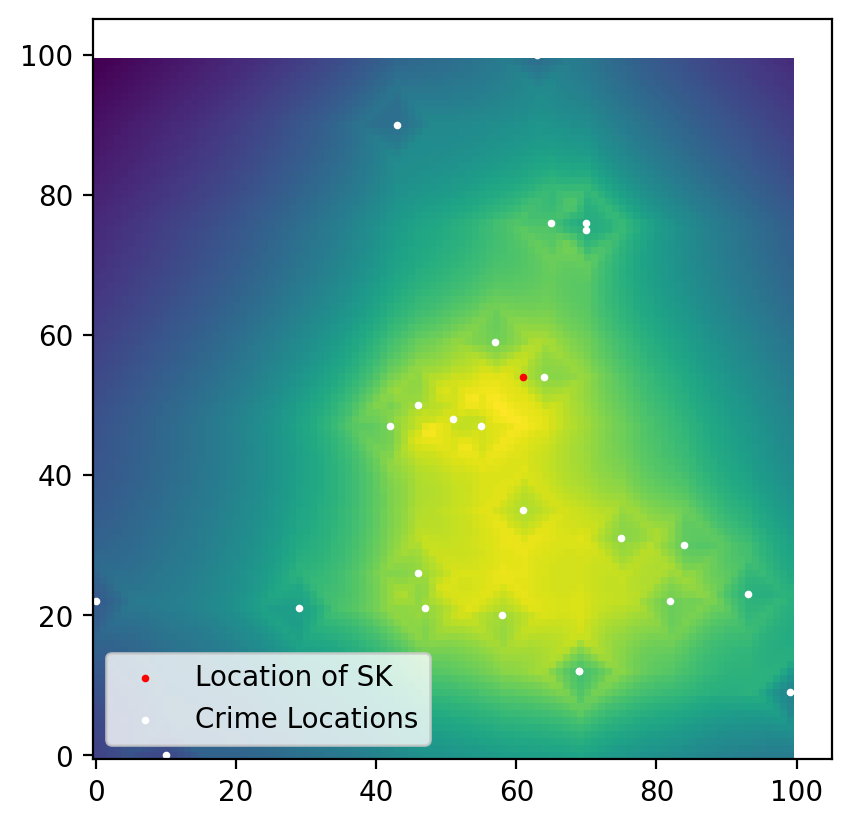

In [30]:
def get_probabilities(list_of_crime_locations):
    n = m = 100
    p = [[0 for j in range(n)] for i in range(m)]
    for i in range(m):
        for j in range(n):
            p[i][j] += probability_of_block(i, j, list_of_crime_locations)

    return p

prob_matrix = get_probabilities(crime_locations)
fig = plt.figure(dpi=200)
img = plt.imshow(prob_matrix, interpolation='nearest', origin='lower')
plt.scatter(SK_location[1], SK_location[0], color="r", label='Location of SK', s = 3)
plt.scatter([a[1] for a in crime_locations], [a[0] for a in crime_locations], color="w", label ='Crime Locations', s = 3)
plt.legend(numpoints=1)
plt.show()

As it turns out, by using the inverse transform to get the geographical coordinates and the most probable spot on the heatmap, we can calculate the distance between those two, which yields 2.37km. As the surface of Atlanta during these killings was 350km$^2$, this result is certainly useful for getting approximate residence areas for criminals.